In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 





In [71]:
housing=pd.read_csv("housing dataset.csv")
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
housing.describe()

,rooms,bedrooms,population,households
count,3.000000,3.0,4.000000,4.000000
mean,3.333333,2.0,5.500000,6.500000
std,0.577350,1.0,1.290994,1.290994
min,3.000000,1.0,4.000000,5.000000
25%,3.000000,1.5,4.750000,5.750000
50%,3.000000,2.0,5.500000,6.500000
75%,3.500000,2.5,6.250000,7.250000
max,4.000000,3.0,7.000000,8.000000


In [69]:
# ocean proximity is a catagorical data , so find how many lies in same catgory
housing["ocean_proximity"].value_counts()

ocean_proximity
A    2
B    1
C    1
Name: count, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

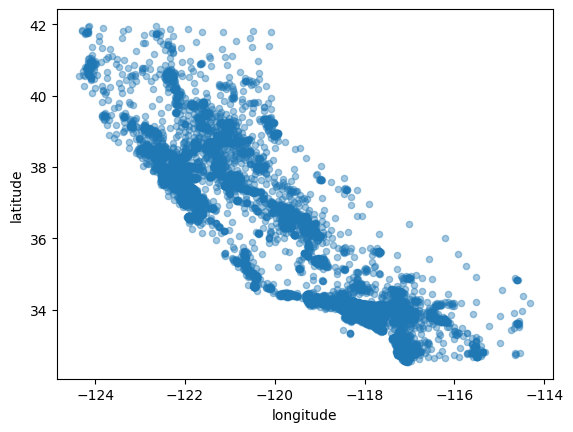

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

In [44]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]



In [45]:
#imputer are the classes that is used to fill the missing values in a dataset 
imputer= SimpleImputer(strategy="median")
#droping the column of catogorical data
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
imputer.statistics_
housing_num.median()

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
rooms_per_household              5.229129
bedrooms_per_room                0.203162
population_per_household         2.818116
dtype: float64

In [47]:
    X=imputer.transform(housing_num)

In [21]:
#converting text or catagorical data into nteger catagories then into one hotvector
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat = housing["ocean_proximity"]
housing_cat_1hot= encoder.fit_transform(housing_cat)

In [22]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Sample dataset
housing = np.array([[1, 2, 3, 4, 5, 6, 7, 8],
                   [2, 3, 4, 5, 6, 7, 8, 9],
                   [3, 4, 5, 6, 7, 8, 9, 10]])

# Column indices
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):#constructor method
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Create an instance of CombinedAttributesAdder
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# Transform the data
housing_extra_attribs = attr_adder.transform(housing)

print(housing_extra_attribs)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          0.57142857  0.85714286]
 [ 2.          3.          4.          5.          6.          7.
   8.          9.          0.625       0.875     ]
 [ 3.          4.          5.          6.          7.          8.
   9.         10.          0.66666667  0.88888889]]


In [58]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Sample DataFrame
data = {'rooms': [3, 4, np.nan, 3],
        'bedrooms': [2, np.nan, 1, 3],
        'population': [5, 6, 7, 4],
        'households': [7, 8, 6, 5],
        'ocean_proximity': ['A', 'B', 'A', 'C']}
housing = pd.DataFrame(data)

# Define the column indices for numerical attributes
num_attribs = ['rooms', 'bedrooms', 'population', 'households']

# Define the column indices for categorical attributes
cat_attribs = ['ocean_proximity']

# Custom transformer to add attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 0] / X[:, 3]
        population_per_household = X[:, 2] / X[:, 3]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 1] / X[:, 0]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Create a numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler())
])

# Create a categorical pipeline
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

# Full pipeline for both numerical and categorical attributes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])

# Apply the full pipeline to your data
housing_prepared = preprocessor.fit_transform(housing)
housing_prepared.shape


C:\Users\mroha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(4, 10)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
lin_reg =LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

ValueError: Found input variables with inconsistent numbers of samples: [4, 20640]